<a href="https://colab.research.google.com/github/ingcarlosleon/Anaisis_Exploratorios_Datos/blob/main/An%C3%A1lisis_Exploratorio_SUIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Análisis exploratorio de los datos del SUIT**

Para este análisis se realizó con la fuente de datos del SUIT **con cohorte al 30-06-2025 entregado por el DAFP**, adicionalmente se uso un comprobador avanzado de disponibilidad de URL, el cual comprueba la disponibilidad de los enlaces web con manejo integral de errores, lógica de reintento y seguimiento del progreso.

Fuente: https://github.com/Ap6pack/advanced-url-checker

Se consideraron variables del conjunto de datos para realizar este análisis exploratorio cómo:
- **Estado trámite**: ELIMINADO, PUBLICADO, CANCELADO,SIN_GESTION, EN_CORRECCION_CREA, EN_CREACION,EN_REVISION_INSTI
- **URL_TRAMITE_EN_LINEA**: Almacena URL
- **Costo total**: Almacena el costo del tramite


###**✅ 1. Clonar el repositorio y entrar en la carpeta**

In [72]:
!git clone https://github.com/Ap6pack/advanced-url-checker.git
%cd advanced-url-checker

Cloning into 'advanced-url-checker'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 35 (delta 12), reused 33 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 30.79 KiB | 563.00 KiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/advanced-url-checker/advanced-url-checker


###**✅ 2. Instalar dependencias**

In [73]:
!pip install -r requirements.txt

###**✅ 3. Crear carpeta log para evitar error**

In [74]:
import os
os.makedirs("/content/advanced-url-checker/log", exist_ok=True)

###**✅ 4. Subir y procesar el archivo Excel**
*  Se carga el archivo **2025_06_30_Base_SUIT.xlsx** al repositorio "Archivos" en Google Drive, simplemente arrastrandolo desde el directorio en donde este alojado
*  Se Leen las URLs válidas (sin eliminar duplicados)!

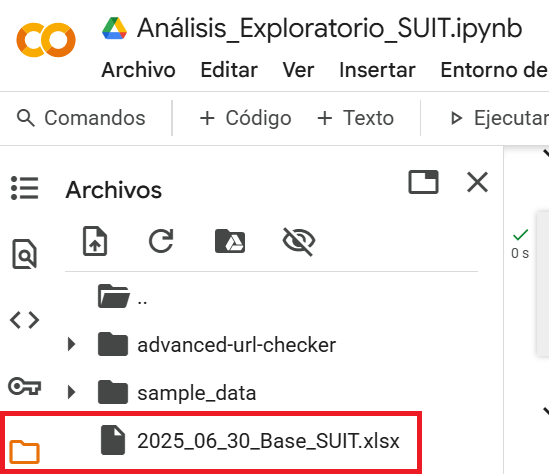

In [75]:
import pandas as pd

# ✅ Leer el archivo desde la raíz de Colab
df = pd.read_excel("/content/2025_06_30_Base_SUIT.xlsx")

#### Mostrar todos los tramites por Estado trámite

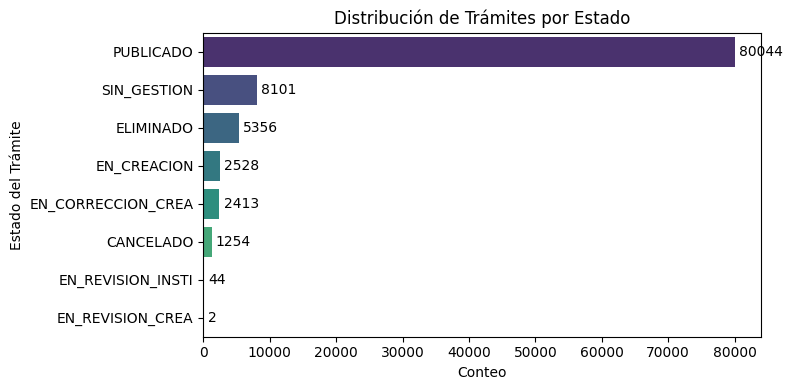

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar cuántos trámites hay por estado
estado_counts = df['Estado trámite'].value_counts().reset_index()
estado_counts.columns = ['Estado trámite', 'Conteo']

# Ordenar de mayor a menor
estado_counts_sorted = estado_counts.sort_values(by='Conteo', ascending=False)

# Crear gráfico de barras horizontal
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Conteo', y='Estado trámite', data=estado_counts_sorted, palette='viridis')

# Agregar etiquetas de cantidad sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Configurar etiquetas del gráfico
plt.xlabel('Conteo')
plt.ylabel('Estado del Trámite')
plt.title('Distribución de Trámites por Estado')
plt.tight_layout()
plt.show()

In [77]:
# Filter the DataFrame to keep only rows where 'Estado trámite' is 'PUBLICADO'
df = df[df['Estado trámite'] == 'PUBLICADO'].copy()

# Display the first few rows of the filtered DataFrame
display(df.head())

# Print the number of rows in the filtered DataFrame
print(f"Número de trámites con estado 'PUBLICADO': {df.shape[0]}")

,Código SIGEP,Nombre de la entidad,Orden,Naturaleza jurídica,Sector,Departamento,Municipio,Categoría,Id interno,Número trámite,...,Numero de documentos,Numero de formularios,Tiene costo,Costo total,Medio,PRODUCTO_FINAL,Tiempo de obtención,Obs_tiemp_obtención,Medio resultado,Dirigido a
0,8000,ADMINISTRADORA COLOMBIANA DE PENSIONES,NACIONAL,Empresas Industriales y Comerciales del Estado,TRABAJO,Bogotá D.C,BOGOTÁ,No Aplica,238915,10.0,...,13,1,No,0.0,TOTALMENTE,Carta de confirmación de actualización de datos,15 DIA HABIL,El cambio se hace efectivo una vez se validen ...,"Correo certificado,Presencial,Página web,","Ciudadano,Extranjeros"
1,8000,ADMINISTRADORA COLOMBIANA DE PENSIONES,NACIONAL,Empresas Industriales y Comerciales del Estado,TRABAJO,Bogotá D.C,BOGOTÁ,No Aplica,238916,12.0,...,6,1,No,0.0,TOTALMENTE,Cuando este se realiza de manera electrónica l...,15 DIA HABIL,Para realizar el tramite a traves del portal...,"Correo certificado,Presencial,Página web,","Instituciones o dependencias públicas,Ciudadan..."
2,8000,ADMINISTRADORA COLOMBIANA DE PENSIONES,NACIONAL,Empresas Industriales y Comerciales del Estado,TRABAJO,Bogotá D.C,BOGOTÁ,No Aplica,238918,15.0,...,9,1,No,0.0,TOTALMENTE,Respuesta de bienvenida,8 DIA CALENDARIO,Si el proceso se realiza de forma electrónica ...,"Correo electrónico,Correo certificado,Presenci...","Ciudadano,Extranjeros"
3,8000,ADMINISTRADORA COLOMBIANA DE PENSIONES,NACIONAL,Empresas Industriales y Comerciales del Estado,TRABAJO,Bogotá D.C,BOGOTÁ,No Aplica,224754,1126.0,...,4,3,No,0.0,TOTALMENTE,Dictamen o resultado por parte de Colpensiones...,4 MES,El término se postergará cuando se soliciten d...,"Correo electrónico,Presencial,","Ciudadano,"
6,8000,ADMINISTRADORA COLOMBIANA DE PENSIONES,NACIONAL,Empresas Industriales y Comerciales del Estado,TRABAJO,Bogotá D.C,BOGOTÁ,No Aplica,246412,35926.0,...,12,3,No,0.0,TOTALMENTE,Historia laboral actualizada y corregida,60 DIA HABIL,Para actualización de tiempos públicos se tien...,"Correo electrónico,Correo certificado,Correo n...","Ciudadano,Extranjeros"


Número de trámites con estado 'PUBLICADO': 80044


In [78]:
# Calculate the number of missing values for each column in the filtered df
missing_values = df.isnull().sum() + (df == "").sum() # Count both NaN and empty strings

# Filter for columns with missing values and sort in descending order
top_missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Get the top 10 columns with the most missing values
top_10_missing = top_missing_values.head(10).reset_index()
top_10_missing.columns = ["Variable", "Cantidad de vacíos/nulos"]

# Calculate the percentage of missing values for each of the top 10 variables
total_rows = df.shape[0]
top_10_missing["Porcentaje"] = (top_10_missing["Cantidad de vacíos/nulos"] / total_rows * 100).round(2)

# Display the table
display(top_10_missing)

,Variable,Cantidad de vacíos/nulos,Porcentaje
0,Obs_tiemp_obtención,73710,92.09
1,URL_TRAMITE_EN_LINEA,72149,90.14
2,Fecha Llegada al DAFP,21492,26.85
3,Fecha Asignación asesor,20953,26.18
4,Fecha Sin Gestión,15755,19.68
5,Fecha En Creación,6196,7.74
6,Sector,701,0.88
7,Categoría,84,0.10
8,Número trámite,2,0.00
9,Fecha Publicado,2,0.00


In [79]:
# ✅ Diagnóstico completo del contenido original
total_registros = df.shape[0]
nulos = df["URL_TRAMITE_EN_LINEA"].isna().sum()
vacios = df["URL_TRAMITE_EN_LINEA"].apply(lambda x: isinstance(x, str) and x.strip() == "").sum()
no_strings = df["URL_TRAMITE_EN_LINEA"].apply(lambda x: not isinstance(x, str) and pd.notna(x)).sum()

print("🔍 Diagnóstico de la columna 'URL_TRAMITE_EN_LINEA'")
print(f"📄 Total de filas en el archivo: {total_registros}")
print(f"🚫 Valores nulos: {nulos}")
print(f"🚫 Strings vacíos o solo espacios: {vacios}")
print(f"🚫 Celdas con tipo distinto a string (por ejemplo, número): {no_strings}")

# ✅ Filtrar solo URLs válidas (sin quitar duplicados)
urls = df["URL_TRAMITE_EN_LINEA"].dropna()
urls = [u for u in urls if isinstance(u, str) and u.strip() != ""]

# ✅ Guardar todas las URLs válidas (incluso duplicadas) en archivo de texto
with open("urls.txt", "w") as f:
    f.write("\n".join(urls))

print(f"\n✅ Se guardaron {len(urls)} URLs válidas (con duplicados) en 'urls.txt'")

🔍 Diagnóstico de la columna 'URL_TRAMITE_EN_LINEA'
📄 Total de filas en el archivo: 80044
🚫 Valores nulos: 72149
🚫 Strings vacíos o solo espacios: 0
🚫 Celdas con tipo distinto a string (por ejemplo, número): 0

✅ Se guardaron 7895 URLs válidas (con duplicados) en 'urls.txt'


###**4.1 Distribución de URLs Únicas y Duplicadas**

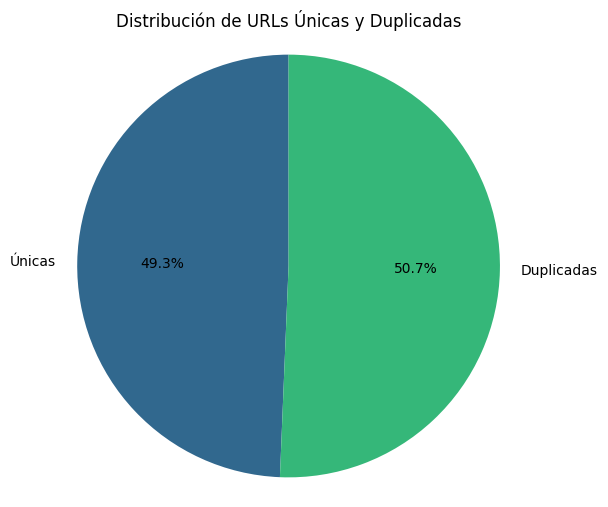

Total de URLs válidas (incluyendo duplicados): 7895
URLs Únicas: 3896
URLs Duplicadas: 3999


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the URLs from the specified column, drop NaNs and empty strings
urls_column = df["URL_TRAMITE_EN_LINEA"].dropna()
urls_column = urls_column[urls_column != ""]

# Calculate unique and duplicate counts
total_urls = len(urls_column)
unique_urls = urls_column.nunique()
duplicate_urls = total_urls - unique_urls

# Create a DataFrame for plotting
data = {'Category': ['Únicas', 'Duplicadas'],
        'Count': [unique_urls, duplicate_urls]}
df_counts = pd.DataFrame(data)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_counts['Count'], labels=df_counts['Category'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis', len(df_counts)))
plt.title("Distribución de URLs Únicas y Duplicadas")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f"Total de URLs válidas (incluyendo duplicados): {total_urls}")
print(f"URLs Únicas: {unique_urls}")
print(f"URLs Duplicadas: {duplicate_urls}")

###**4.2 Top 10 del número y porcentaje de URLs duplicadas sobre el total**

In [81]:
# Get the URLs from the specified column, drop NaNs and empty strings
urls_column = df["URL_TRAMITE_EN_LINEA"].dropna()
urls_column = urls_column[urls_column != ""]

# Calculate the frequency of each URL
url_counts = urls_column.value_counts()

# Filter for duplicate URLs (count > 1)
duplicate_urls_counts = url_counts[url_counts > 1]

# Get the top 10 most frequent duplicate URLs
top_10_duplicates = duplicate_urls_counts.head(10).reset_index()
top_10_duplicates.columns = ["URL", "Conteo"]

# Calculate the percentage of each top 10 duplicate URL out of the total valid URLs (8650)
total_valid_urls = 8650
top_10_duplicates["Porcentaje"] = (top_10_duplicates["Conteo"] / total_valid_urls * 100).round(2)

# Display the table
display(top_10_duplicates)

,URL,Conteo,Porcentaje
0,http://sac2.gestionsecretariasdeeducacion.gov....,98,1.13
1,https://portalciudadano.sisben.gov.co/,89,1.03
2,http://vital.minambiente.gov.co/SILPA/TestSilp...,67,0.77
3,https://www.ventanillamovilidad.com.co/,50,0.58
4,https://www.marmato-caldas.gov.co/peticiones-q...,42,0.49
5,https://digital.movilidadpereira.gov.co/portal...,41,0.47
6,https://infoconsumo.syc.com.co/,39,0.45
7,https://mercurio.antioquia.gov.co/mercurio/Ser...,35,0.40
8,https://movilidad.alcaldiafusagasuga.gov.co/tr...,33,0.38
9,https://sedeelectronica.supervigilancia.gov.co/,33,0.38


###**✅ 5. Ejecutar el validador**

In [86]:
%cd /content/advanced-url-checker

/content/advanced-url-checker


In [87]:
import os
os.makedirs("log", exist_ok=True)

In [88]:
!python endpoint_checker.py urls.txt -o resultados.csv --threads 30

2025-08-07 06:03:12,813 - WARNING - Blocked private IP: http://172.20.3.189:8280/consultaCedulas/public/consultarCertificadoEstadoPPT.jsf
2025-08-07 06:03:12,813 - WARNING - Invalid URL on line 132: http://172.20.3.189:8280/consultaCedulas/public/consultarCertificadoEstadoPPT.jsf
2025-08-07 06:03:12,820 - WARNING - Invalid URL on line 211: http://www.reincorporacion.gov.co/es/agencia/Paginas/maestro-de-documentos.aspx?Paged=TRUE&p_ProcesoSIGER=Implementaci%c3%b3n&p_TipoSIGER=Instructivo&p_ID=256407&PageFirstRow=451&&View
2025-08-07 06:03:12,821 - WARNING - Invalid URL on line 212: http://www.reincorporacion.gov.co/es/agencia/Paginas/maestro-de-documentos.aspx?Paged=TRUE&p_ProcesoSIGER=Implementaci%c3%b3n&p_TipoSIGER=Instructivo&p_ID=256407&PageFirstRow=451&&View
2025-08-07 06:03:12,821 - WARNING - Invalid URL on line 214: http://contacto@archivogeneral.gov.co;gt@archivogeneral.gov.co
2025-08-07 06:03:12,821 - WARNING - Invalid URL on line 215: http://servicioalpublico@archivogeneral.go

###**✅ Paso 6: Convertir resultados.csv en un DataFrame estructurado**

In [89]:
import pandas as pd
import re

# Leer las líneas
with open("/content/advanced-url-checker/resultados.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

data = []

# Parsear cada línea
for line in lines:
    line = line.strip()

    # Línea con error
    if "ERROR" in line:
        match = re.match(r"^(.*?): ERROR \[([\d.]+)\] - (.*)", line)
        if match:
            url, tiempo, mensaje_error = match.groups()
            data.append({
                "url": url,
                "estado": "ERROR",
                "codigo_http": None,
                "tiempo_respuesta": float(tiempo),
                "mensaje_error": mensaje_error
            })
        continue

    # Línea válida con código HTTP
    match = re.match(r"^(.*?): (\w+) \(HTTP (\d+)\) \[([\d.]+)\]$", line)
    if match:
        url, estado, codigo, tiempo = match.groups()
        data.append({
            "url": url,
            "estado": estado,
            "codigo_http": int(codigo),
            "tiempo_respuesta": float(tiempo),
            "mensaje_error": None
        })

# Crear DataFrame
df_resultados = pd.DataFrame(data)
df_resultados.head()


,url,estado,codigo_http,tiempo_respuesta,mensaje_error
0,https://www.gov.co/tramites-y-servicios/dps/co...,ACTIVE,200.0,0.124,None
1,https://simo4.cnsc.gov.co/,ACTIVE,200.0,0.474,None
2,https://simo4.cnsc.gov.co/,ACTIVE,200.0,0.473,None
3,https://simo4.cnsc.gov.co/,ACTIVE,200.0,0.478,None
4,https://afiliaciones.fna.gov.co:8051/afiliacio...,ACTIVE,200.0,0.539,None


###**✅ Paso 7: Detectar si redirige al home del dominio**

In [90]:
from urllib.parse import urlparse

def redirige_a_home(row):
    try:
        parsed = urlparse(row["url"])
        if parsed.path not in ["", "/"]:
            return parsed.netloc + "/"
        else:
            return None
    except:
        return None

df_resultados["redirige_al_home"] = df_resultados.apply(redirige_a_home, axis=1)

###**✅ Paso 8: Clasificar las URLs**
Crea una columna clasificacion con valores:

*   "FUNCIONA"
*   "ROTO"
*   "REDIRECCIONA AL HOME"
*   "SIN CLASIFICAR"

In [91]:
def clasificar_url(row):
    if row["estado"] == "ERROR":
        return "ROTO"
    if row["codigo_http"] and row["codigo_http"] >= 400:
        return "ROTO"
    if row["redirige_al_home"]:
        return "REDIRECCIONA AL HOME"
    if row["codigo_http"] and 200 <= row["codigo_http"] < 400:
        return "FUNCIONA"
    return "SIN CLASIFICAR"

df_resultados["clasificacion"] = df_resultados.apply(clasificar_url, axis=1)


###**✅ Paso 9: Generar tabla resumen para informe**

In [92]:
# Conteo total por categoría
resumen = df_resultados["clasificacion"].value_counts().reset_index()
resumen.columns = ["clasificacion", "cantidad"]

# Calcular porcentaje
total = resumen["cantidad"].sum()
resumen["porcentaje"] = (resumen["cantidad"] / total * 100).round(2)

resumen


,clasificacion,cantidad,porcentaje
0,REDIRECCIONA AL HOME,4612,63.35
1,ROTO,1391,19.11
2,FUNCIONA,1277,17.54


###**✅ Paso 10: Exportar resultados completos a Excel**

In [93]:
df_resultados.to_excel("resultados_clasificados.xlsx", index=False)

from google.colab import files
files.download("resultados_clasificados.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **✅ 9.1. Gráfico de Barras Horizontales**

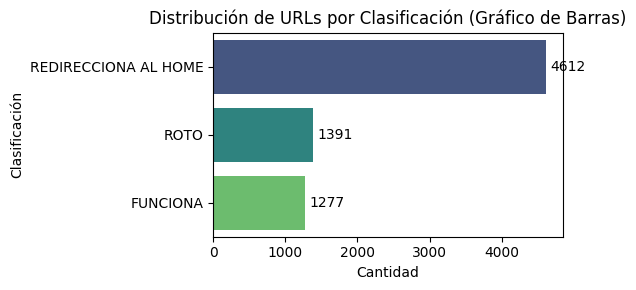

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🔇 Ocultar advertencias tipo FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Ordenar por cantidad
resumen_sorted = resumen.sort_values(by="cantidad", ascending=False)

# Crear gráfico de barras horizontal
plt.figure(figsize=(6, 3))
ax = sns.barplot(x="cantidad", y="clasificacion", data=resumen_sorted, palette="viridis")

# Etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.xlabel("Cantidad")
plt.ylabel("Clasificación")
plt.title("Distribución de URLs por Clasificación (Gráfico de Barras)")
plt.tight_layout()
plt.show()

### **✅ 9.2. Gráfico de Torta**

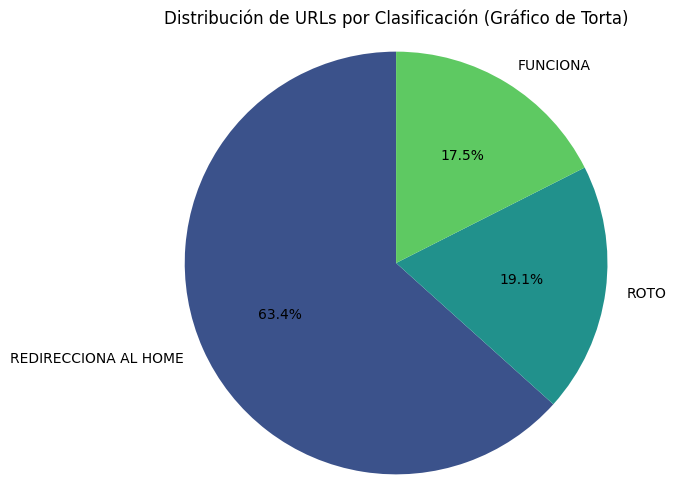

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the resumen DataFrame by count in descending order
resumen_sorted = resumen.sort_values(by="cantidad", ascending=False)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(resumen_sorted["cantidad"], labels=resumen_sorted["clasificacion"],
autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(resumen_sorted)))
plt.title("Distribución de URLs por Clasificación (Gráfico de Torta)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###**🧩 Resumen del Gráfico y Hallazgos**

*  63.4% de los enlaces analizados redirigen al inicio del portal (home) en lugar de llevar al trámite o servicio específico.

*  19.1% están rotos (no funcionan).

*  Solo 17.5% funcionan correctamente y llevan al contenido esperado.

**🧬 ¿Por qué ocurre esto?**

- Muchos portales del distrito, como el de la Alcaldía de Bogotá, usan tecnologías modernas (como Liferay) que cargan contenido sin cambiar completamente la dirección del sitio. Por eso:

- Aunque el ciudadano navega internamente, al copiar el enlace este no lleva al mismo lugar, sino al inicio del portal.

- Esto se conoce como una aplicación de página única (SPA), y requiere una configuración especial para que los enlaces sean reutilizables.

**📌 ¿Por qué es importante?**

- Afecta la experiencia del ciudadano.

- Reduce la efectividad de las estrategias de servicios digitales.

- Complica el acceso real a trámites, especialmente desde plataformas como el SUIT o redes sociales.

**✅ Recomendaciones**
- Auditar periódicamente los enlaces públicos.

- Configurar los portales para que los enlaces sean compartibles y reutilizables.

- Coordinar entre tecnología y comunicaciones para mejorar el acceso real a los servicios digitales.

### **✅ 10. Tabla del top 10 de enlaces rotos**

In [103]:
import pandas as pd
from IPython.display import display, HTML

# Filtrar el DataFrame de resultados para URLs con clasificación 'ROTO'
roto_urls_df = df_resultados[df_resultados['clasificacion'] == 'ROTO'].copy()

# Encontrar URLs duplicadas dentro del estado 'ROTO'
# duplicated(keep=False) marca todas las ocurrencias de un duplicado como True
duplicated_roto_urls = roto_urls_df[roto_urls_df.duplicated(subset=['url'], keep=False)]

# Contar las ocurrencias de cada URL duplicada en estado 'ROTO'
duplicated_roto_counts = duplicated_roto_urls['url'].value_counts()

# Obtener el top 10 de las URLs duplicadas en estado 'ROTO' más frecuentes
top_10_roto_duplicates_counts = duplicated_roto_counts.head(10).reset_index()
top_10_roto_duplicates_counts.columns = ["URL", "Conteo"]

# Opcional: Obtener información adicional de estas URLs del DataFrame original roto_urls_df
# Esto puede ser útil si necesitas otras columnas además de la URL y el conteo
# top_10_roto_duplicates_info = roto_urls_df[roto_urls_df['url'].isin(top_10_roto_duplicates_counts['URL'])].drop_duplicates(subset=['url'])
# top_10_final = pd.merge(top_10_roto_duplicates_counts, top_10_roto_duplicates_info[['url', 'codigo_http', 'mensaje_error']], on='URL', how='left')


# Formatear las URLs como enlaces HTML
def make_clickable(url):
    return f'<a href="{url}" target="_blank">{url}</a>'

# Aplicar el formato a la columna 'URL'
top_10_roto_duplicates_counts['URL'] = top_10_roto_duplicates_counts['URL'].apply(make_clickable)


# Mostrar la tabla como HTML para que los enlaces sean clickeables
# Se usa .to_html() para renderizar el DataFrame como HTML
display(HTML(top_10_roto_duplicates_counts.to_html(escape=False))) # escape=False permite que se renderice el HTML

,URL,Conteo
0,https://serviciosdigitales.movilidadavanzadabello.com.co/portal-servicios/#/public,55
1,https://gestdoc.barranquilla.gov.co/RadicacionSolicitudes/,28
2,http://contactenos@madridcundinamarca.gov.co,22
3,http://gestdoc.barranquilla.gov.co:83/RadicacionSolicitudes/,21
4,https://www.cartago.gov.co/quejas-y-reclamos/,19
5,https://www.integracionsocial.gov.co/index.php/atencion-ciudadana/puntos-atencion,17
6,https://www.aerocivil.gov.co/atencion/informaci%C3%B3n/tr%C3%A1mites-y-servicios,16
7,https://www.metropol.gov.co/tramitesenlinea,14
8,https://www.secretariadeambiente.gov.co/ventanillavirtual/app,14
9,https://sgi.caldas.gov.co/sgi/secciones/tramites/diligenciarTramite.php?instance=6776649b4a1c7e3518b9f3551987a132&tipoId=62&token=db92adc08482e068f4a38df700cfc665,13


### **✅ 11. Tabla del top 10 de enlaces que redireccionan al home (REVISAR)**

In [105]:
import pandas as pd
from IPython.display import display, HTML

# Filtrar el DataFrame de resultados para URLs con clasificación 'REDIRECCIONA AL HOME'
redirige_urls_df = df_resultados[df_resultados['clasificacion'] == 'REDIRECCIONA AL HOME'].copy()

# Encontrar URLs duplicadas dentro del estado 'REDIRECCIONA AL HOME'
# duplicated(keep=False) marca todas las ocurrencias de un duplicado como True
duplicated_redirige_urls = redirige_urls_df[redirige_urls_df.duplicated(subset=['url'], keep=False)]

# Contar las ocurrencias de cada URL duplicada en estado 'REDIRECCIONA AL HOME'
duplicated_redirige_counts = duplicated_redirige_urls['url'].value_counts().reset_index()
duplicated_redirige_counts.columns = ["URL", "Conteo"]

# Obtener el top 10 de las URLs duplicadas en estado 'REDIRECCIONA AL HOME' más frecuentes
top_10_redirige_duplicates_counts = duplicated_redirige_counts.head(10)

# Opcional: Fusionar con el DataFrame original (df) para obtener el 'Nombre del trámite'
# Se realiza un merge para obtener la información del trámite para cada URL
# Se usa 'left' merge para mantener todas las filas del top_10_redirige_duplicates_counts
# Se eliminan duplicados en la columna 'URL_TRAMITE_EN_LINEA' del dataframe original para evitar filas excesivas
df_unique_urls = df.drop_duplicates(subset=['URL_TRAMITE_EN_LINEA'])
top_10_with_nombre_redirige = pd.merge(top_10_redirige_duplicates_counts, df_unique_urls[['URL_TRAMITE_EN_LINEA', 'Nombre del trámite']],
                              left_on='URL', right_on='URL_TRAMITE_EN_LINEA', how='left')

# Eliminar la columna duplicada 'URL_TRAMITE_EN_LINEA' si existe
top_10_with_nombre_redirige = top_10_with_nombre_redirige.drop(columns=['URL_TRAMITE_EN_LINEA'])


# Formatear las URLs como enlaces HTML
def make_clickable(url):
    return f'<a href="{url}" target="_blank">{url}</a>'

# Aplicar el formato a la columna 'URL'
top_10_with_nombre_redirige['URL'] = top_10_with_nombre_redirige['URL'].apply(make_clickable)

# Reordenar columnas para que 'Nombre del trámite' aparezca primero
top_10_final_redirige = top_10_with_nombre_redirige[['Nombre del trámite', 'URL', 'Conteo']]

# Mostrar la tabla como HTML para que los enlaces sean clickeables
# Se usa .to_html() para renderizar el DataFrame como HTML
display(HTML(top_10_final_redirige.to_html(escape=False))) # escape=False permite que se renderice el HTML

,Nombre del trámite,URL,Conteo
0,Actualización información en la base de datos del sistema de identificación y clasificación de potenciales beneficiarios de programas sociales – SISBEN,http://sac2.gestionsecretariasdeeducacion.gov.co/app_Login/?sec=104,99
1,"Acreditación o Certificación de las inversiones realizadas en control, conservación y mejoramiento del medio ambiente para obtener descuento en el impuesto sobre la renta",http://vital.minambiente.gov.co/SILPA/TestSilpa/security/login.aspx,68
2,Aprobación de los planos de propiedad horizontal,https://www.marmato-caldas.gov.co/peticiones-quejas-reclamos,42
3,Cambio de carrocería de un vehículo automotor,https://digital.movilidadpereira.gov.co/portal-servicios/#/agendar-cita-publica,41
4,Blindaje de un vehículo automotor,https://movilidad.alcaldiafusagasuga.gov.co/tramites/,33
5,Auxilio_Funerario,https://sedeelectronica.ugpp.gov.co/SedeElectronica/tramites/browser.do#no-back-button,30
6,Actas orgánicas y estatutos de fondos mutuos de inversión,https://wl.superfinanciera.gov.co/SiriWeb/,29
7,Autorización de calendario académico especial,http://sac2.gestionsecretariasdeeducacion.gov.co/app_Login/,29
8,"Acreditación o Certificación de las inversiones realizadas en control, conservación y mejoramiento del medio ambiente para obtener descuento en el impuesto sobre la renta",http://vital.minambiente.gov.co/SILPA/TESTSILPA/Security/Login.aspx,29
9,Cambio de carrocería de un vehículo automotor,https://serviciosdetransitodigitales.com/portal-servicios/#/agendar-cita-publica,28
